In [286]:
# import required libraries for dataframe and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [287]:
data = pd.read_csv("merged_ecommerce.csv")
data

/var/folders/s5/1203q68j6lqgl604z3g6p36w0000gn/T/ipykernel_3957/3378806773.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("merged_ecommerce.csv")


,Unnamed: 0,InvoiceNo,ASIN,Quantity,price,total_sale,invoice_date,invoice_time,CustomerID,ASIN.1,title,product_type,CustomerID.1,Country,rating,review_count,ASIN.2,StockCode,ASIN.3
0,0,78536597,B07GWKDLGT,4,496.95,1987.80,2018-12-01,17,18011,B07GWKDLGT,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,18011,Germany,4.6,1399,B07GWKDLGT,21703,B07GWKDLGT
1,1,78536597,B01MTLH408,4,39.99,159.96,2018-12-01,17,18011,B01MTLH408,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,18011,Germany,4.6,289,B01MTLH408,40001,B01MTLH408
2,2,78536597,B0064FS7HI,1,12.99,12.99,2018-12-01,17,18011,B0064FS7HI,"STK LP-E8 Battery for Canon Rebel T5i, T3i, T2...",dslr camera,18011,Germany,4.4,333,B0064FS7HI,85034A,B0064FS7HI
3,3,78536597,B013JHU5YG,1,199.99,199.99,2018-12-01,17,18011,B013JHU5YG,Lowepro Whistler BP 350 AW (Grey) . Profession...,dslr camera,18011,Germany,4.3,86,B013JHU5YG,72798C,B013JHU5YG
4,4,78536597,B06XWN9Q99,1,7.49,7.49,2018-12-01,17,18011,B06XWN9Q99,Samsung (MB-ME32GA/AM) 32GB 95MB/s (U1) microS...,dslr camera,18011,Germany,4.7,15717,B06XWN9Q99,20726,B06XWN9Q99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554412,554412,78581476,B00SB6SPA2,12,14.99,179.88,2019-12-09,8,12433,B00SB6SPA2,AUSDOM Lightweight Over-Ear Wired HiFi Stereo ...,smartphone,12433,Norway,4.0,3159,B00SB6SPA2,23243,B00SB6SPA2
554413,554413,78581476,B07TKTRX6B,6,29.99,179.94,2019-12-09,8,12433,B07TKTRX6B,"Squish Qi Wireless Car Charger, Wireless Charg...",smartphone,12433,Norway,3.7,1888,B07TKTRX6B,23240,B07TKTRX6B
554414,554414,78581475,B07P8CK47X,12,6.97,83.64,2019-12-09,8,13069,B07P8CK47X,"Cell Phone Stand, 2Pack Cellphone Holder for D...",smartphone,13069,Germany,4.5,449,B07P8CK47X,23235,B07P8CK47X
554415,554415,78581475,B07BDGPDKS,20,13.99,279.80,2019-12-09,8,13069,B07BDGPDKS,USB Certified Type C Cable - EVISTR 3PACK 10FT...,smartphone,13069,Germany,4.6,1368,B07BDGPDKS,22380,B07BDGPDKS


Clean the data set

In [288]:
data.columns.tolist()

['Unnamed: 0',
 'InvoiceNo',
 'ASIN',
 'Quantity',
 'price',
 'total_sale',
 'invoice_date',
 'invoice_time',
 'CustomerID',
 'ASIN.1',
 'title',
 'product_type',
 'CustomerID.1',
 'Country',
 'rating',
 'review_count',
 'ASIN.2',
 'StockCode',
 'ASIN.3']

In [289]:
data = data.drop(columns= ["Unnamed: 0", "ASIN.1", "CustomerID.1", "ASIN.2", "ASIN.3"])
#data = data.loc[ : , ~data.columns.duplicated()].copy()

data

,InvoiceNo,ASIN,Quantity,price,total_sale,invoice_date,invoice_time,CustomerID,title,product_type,Country,rating,review_count,StockCode
0,78536597,B07GWKDLGT,4,496.95,1987.80,2018-12-01,17,18011,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,Germany,4.6,1399,21703
1,78536597,B01MTLH408,4,39.99,159.96,2018-12-01,17,18011,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,Germany,4.6,289,40001
2,78536597,B0064FS7HI,1,12.99,12.99,2018-12-01,17,18011,"STK LP-E8 Battery for Canon Rebel T5i, T3i, T2...",dslr camera,Germany,4.4,333,85034A
3,78536597,B013JHU5YG,1,199.99,199.99,2018-12-01,17,18011,Lowepro Whistler BP 350 AW (Grey) . Profession...,dslr camera,Germany,4.3,86,72798C
4,78536597,B06XWN9Q99,1,7.49,7.49,2018-12-01,17,18011,Samsung (MB-ME32GA/AM) 32GB 95MB/s (U1) microS...,dslr camera,Germany,4.7,15717,20726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554412,78581476,B00SB6SPA2,12,14.99,179.88,2019-12-09,8,12433,AUSDOM Lightweight Over-Ear Wired HiFi Stereo ...,smartphone,Norway,4.0,3159,23243
554413,78581476,B07TKTRX6B,6,29.99,179.94,2019-12-09,8,12433,"Squish Qi Wireless Car Charger, Wireless Charg...",smartphone,Norway,3.7,1888,23240
554414,78581475,B07P8CK47X,12,6.97,83.64,2019-12-09,8,13069,"Cell Phone Stand, 2Pack Cellphone Holder for D...",smartphone,Germany,4.5,449,23235
554415,78581475,B07BDGPDKS,20,13.99,279.80,2019-12-09,8,13069,USB Certified Type C Cable - EVISTR 3PACK 10FT...,smartphone,Germany,4.6,1368,22380


In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554417 entries, 0 to 554416
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     554417 non-null  object 
 1   ASIN          554417 non-null  object 
 2   Quantity      554417 non-null  int64  
 3   price         554417 non-null  float64
 4   total_sale    554417 non-null  float64
 5   invoice_date  554417 non-null  object 
 6   invoice_time  554417 non-null  int64  
 7   CustomerID    554417 non-null  object 
 8   title         554417 non-null  object 
 9   product_type  554417 non-null  object 
 10  Country       554417 non-null  object 
 11  rating        554417 non-null  float64
 12  review_count  554417 non-null  int64  
 13  StockCode     554417 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 59.2+ MB


In [291]:
(data['CustomerID']=='Null').value_counts()

False    415102
True     139315
Name: CustomerID, dtype: int64

In [292]:
# Replace string 'Null' with null value
data=data.replace({'Null': None})
data.head()

,InvoiceNo,ASIN,Quantity,price,total_sale,invoice_date,invoice_time,CustomerID,title,product_type,Country,rating,review_count,StockCode
0,78536597,B07GWKDLGT,4,496.95,1987.80,2018-12-01,17,18011,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,Germany,4.6,1399,21703
1,78536597,B01MTLH408,4,39.99,159.96,2018-12-01,17,18011,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,Germany,4.6,289,40001
2,78536597,B0064FS7HI,1,12.99,12.99,2018-12-01,17,18011,"STK LP-E8 Battery for Canon Rebel T5i, T3i, T2...",dslr camera,Germany,4.4,333,85034A
3,78536597,B013JHU5YG,1,199.99,199.99,2018-12-01,17,18011,Lowepro Whistler BP 350 AW (Grey) . Profession...,dslr camera,Germany,4.3,86,72798C
4,78536597,B06XWN9Q99,1,7.49,7.49,2018-12-01,17,18011,Samsung (MB-ME32GA/AM) 32GB 95MB/s (U1) microS...,dslr camera,Germany,4.7,15717,20726


In [293]:
data.isnull().sum()

InvoiceNo            0
ASIN              8398
Quantity             0
price                0
total_sale           0
invoice_date         0
invoice_time         0
CustomerID      139315
title                0
product_type         0
Country              0
rating               0
review_count         0
StockCode            0
dtype: int64

In [294]:
data.shape

(554417, 14)

In [295]:
# Dropping rows having missing values
data = data.dropna()
data.shape

(409035, 14)

In [296]:
# Changing the datatype of Customer Id as per Business understanding
data.loc['CustomerID'] =data['CustomerID'].astype(str)

pattern analysis

In [297]:
#We are going to analysis the Customers based on below 3 factors:
#R (Recency): Number of days since last purchase
#F (Frequency): Number of tracsactions
#M (Monetary): Total amount of transactions (revenue contributed)

data.loc['Amount'] = data['Quantity']*data['price']
rfm_m = data.groupby('CustomerID')['total_sale'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,total_sale
0,12346,4433604.10
1,12347,210263.69
2,12348,174939.60
3,12349,42183.30
4,12350,17937.80


In [298]:
# New Attribute : Frequency
rfm_f = data.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346,1
1,12347,186
2,12348,28
3,12349,72
4,12350,16


In [299]:
# Merging the two dfs
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,total_sale,Frequency
0,12346,4433604.10,1
1,12347,210263.69,186
2,12348,174939.60,28
3,12349,42183.30,72
4,12350,17937.80,16


In [300]:
data['invoice_date'] = pd.to_datetime(data['invoice_date'])

In [301]:
# Compute the maximum date to know the last transaction date
max_date = max(data['invoice_date'])
max_date

# Compute the difference between max date and transaction date

data['Diff'] = max_date - data['invoice_date']
data.head()

,InvoiceNo,ASIN,Quantity,price,total_sale,invoice_date,invoice_time,CustomerID,title,product_type,Country,rating,review_count,StockCode,Diff
0,78536597,B07GWKDLGT,4.0,496.95,1987.80,2018-12-01,17.0,18011,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,Germany,4.6,1399.0,21703,373 days
1,78536597,B01MTLH408,4.0,39.99,159.96,2018-12-01,17.0,18011,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,Germany,4.6,289.0,40001,373 days
2,78536597,B0064FS7HI,1.0,12.99,12.99,2018-12-01,17.0,18011,"STK LP-E8 Battery for Canon Rebel T5i, T3i, T2...",dslr camera,Germany,4.4,333.0,85034A,373 days
3,78536597,B013JHU5YG,1.0,199.99,199.99,2018-12-01,17.0,18011,Lowepro Whistler BP 350 AW (Grey) . Profession...,dslr camera,Germany,4.3,86.0,72798C,373 days
4,78536597,B06XWN9Q99,1.0,7.49,7.49,2018-12-01,17.0,18011,Samsung (MB-ME32GA/AM) 32GB 95MB/s (U1) microS...,dslr camera,Germany,4.7,15717.0,20726,373 days


In [302]:
# Compute last transaction date to get the recency of customers
rfm_p = data.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
display(rfm_p.head())

# Extract number of days only
rfm_p['Diff'] = rfm_p['Diff'].dt.days
display(rfm_p.head())

,CustomerID,Diff
0,12346,325 days
1,12347,2 days
2,12348,75 days
3,12349,18 days
4,12350,310 days


,CustomerID,Diff
0,12346,325
1,12347,2
2,12348,75
3,12349,18
4,12350,310


In [303]:
# Merge tha dataframes to get the final RFM dataframe
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346,4433604.10,1,325
1,12347,210263.69,186,2
2,12348,174939.60,28,75
3,12349,42183.30,72,18
4,12350,17937.80,16,310


Text(0.5, 0, 'Attributes')

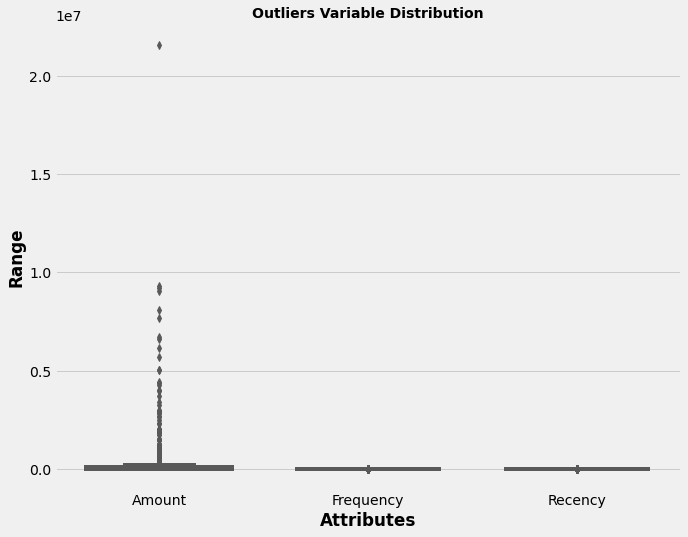

In [304]:
# Outlier Analysis of Amount Frequency and Recency
#There are 2 types of outliers and we will treat outliers as it can skew our dataset (Statistical,Domain specific)

attributes = ['Amount','Frequency','Recency']
#plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [305]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

# Check the shape
rfm.shape

(4259, 4)

In [306]:
#Rescaling the Attributes

#It is extremely important to rescale the variables so that they have a comparable scale.| There are two common ways of rescaling:
#Min-Max scaling, Standardisation (mean-0, sigma-1)

# Rescaling the attributes
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
display(rfm_df_scaled.shape)

rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

(4259, 3)

,Amount,Frequency,Recency
0,1.153632,1.030115,-0.912135
1,0.841366,-0.496830,-0.183865
2,-0.332205,-0.071605,-0.752514
3,-0.546537,-0.612800,2.160568
4,-0.084910,0.025038,-0.572941


Building the Model

K-Means Clustering
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly.
We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
We repeat the process for a given number of iterations and at the end, we have our clusters.

In [307]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [308]:
# Assign the labels to each data point, execute the following script.
kmeans.labels_
label_list=kmeans.labels_
display(sorted(Counter(label_list).items()))
display(kmeans.labels_.shape)

[(0, 2205), (1, 236), (2, 1016), (3, 802)]

(4259,)

Elbow Method

According to the article Elbow Method for optimal value of k in KMeans, "a fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k."

Although our first thought might be that increasing the number of parameters (k) will improve the fit of our model, we risk over-fitting it. The Elbow Curve will help us identify when, if we were to add more clusters, won't add much information to our model. The optimal k value will be where the average distance falls suddendly, which is when the curve starts to become parallel to the x-axis. In this case, we could assume that the optimal number of clusters is 3, but it's not really clear.

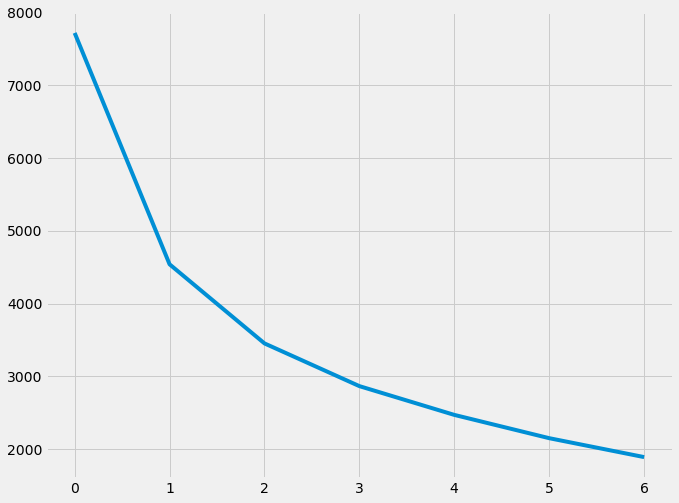

In [309]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

Silhouette score

Another way to determine the number of clusters is using the silhouette analysis. According to the scikit-learn documentation, "can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually."

S score= p-q/max(p,q)

p is the mean distance to the points in the nearest cluster that the data point is not a part of \ q is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.
A score closer to 1 indicates that the data point is very similar to other data points in the cluster,
A score of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters,
A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [310]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5283681965411517
For n_clusters=3, the silhouette score is 0.5017671750105784
For n_clusters=4, the silhouette score is 0.46787463759411546
For n_clusters=5, the silhouette score is 0.4585595057143077
For n_clusters=6, the silhouette score is 0.41171562330936534
For n_clusters=7, the silhouette score is 0.40080095006704897
For n_clusters=8, the silhouette score is 0.3956784648532288


For n_clusters = 2 The average silhouette_score is : 0.5113618606705848
For n_clusters = 3 The average silhouette_score is : 0.5804477233524081
For n_clusters = 4 The average silhouette_score is : 0.5195378158594205
For n_clusters = 5 The average silhouette_score is : 0.489987493350026
For n_clusters = 6 The average silhouette_score is : 0.4668531754479029
For n_clusters = 7 The average silhouette_score is : 0.423988915863792
For n_clusters = 8 The average silhouette_score is : 0.4196095449502223


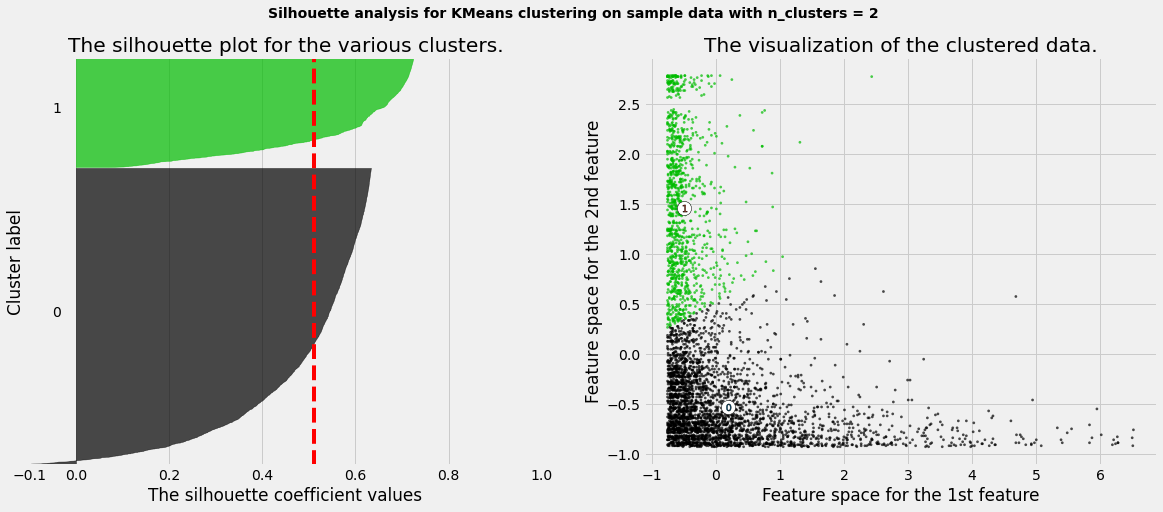

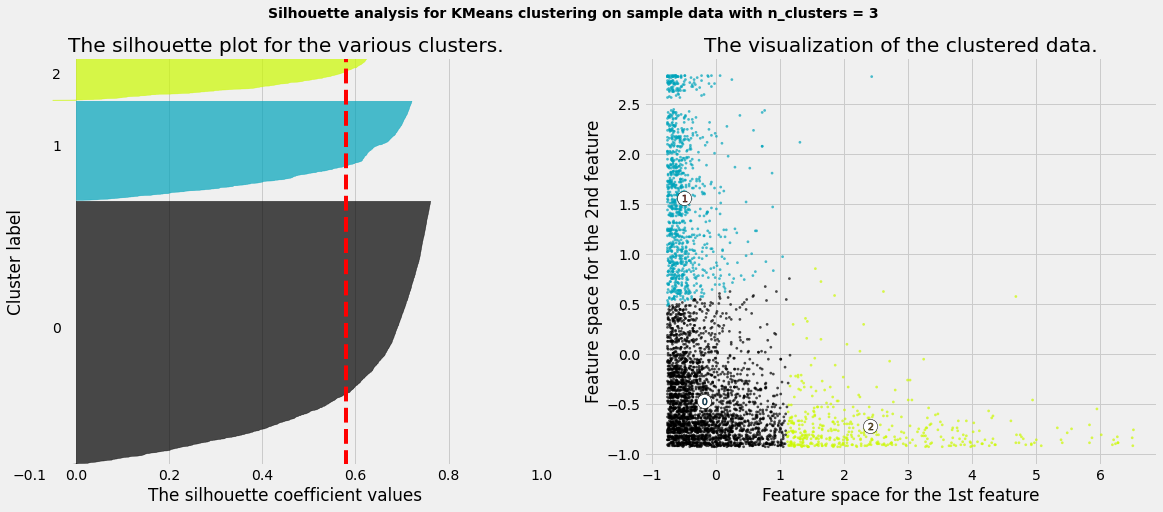

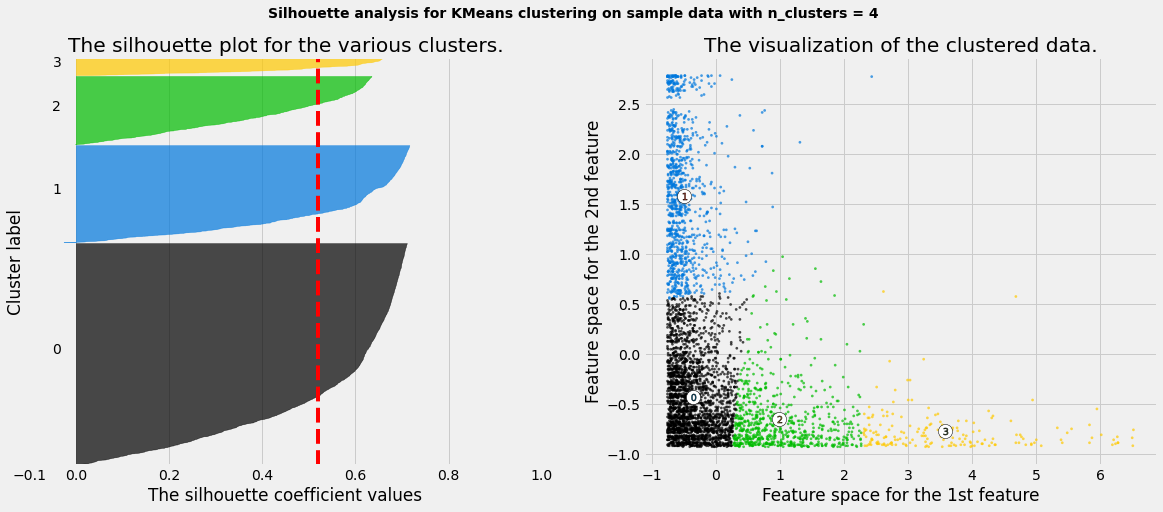

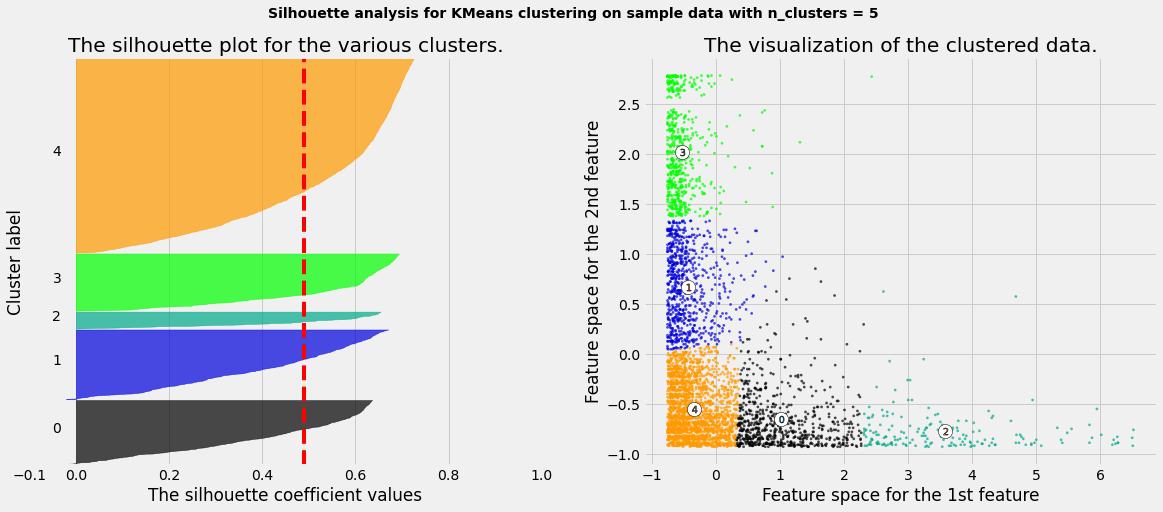

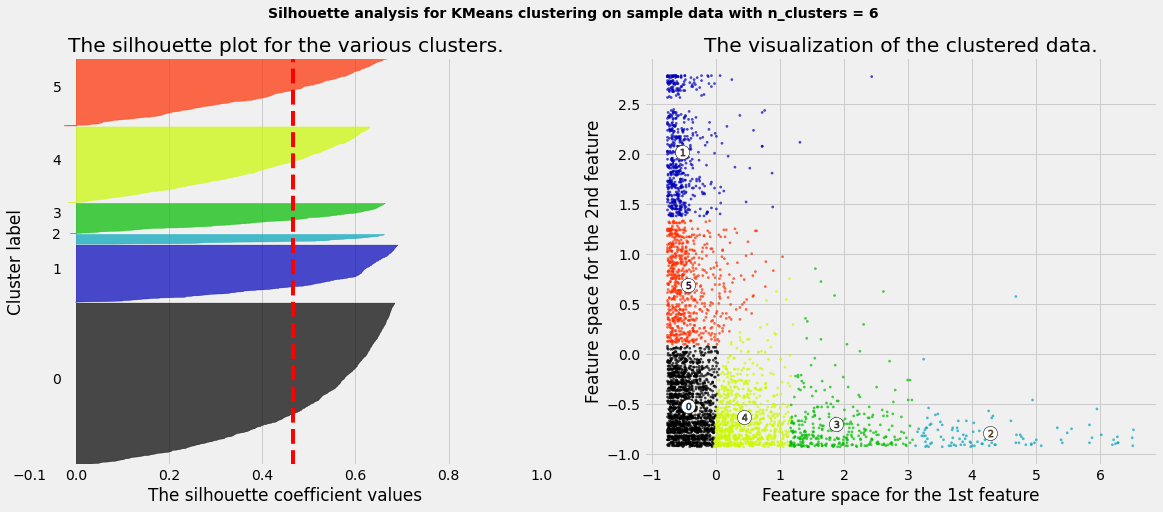

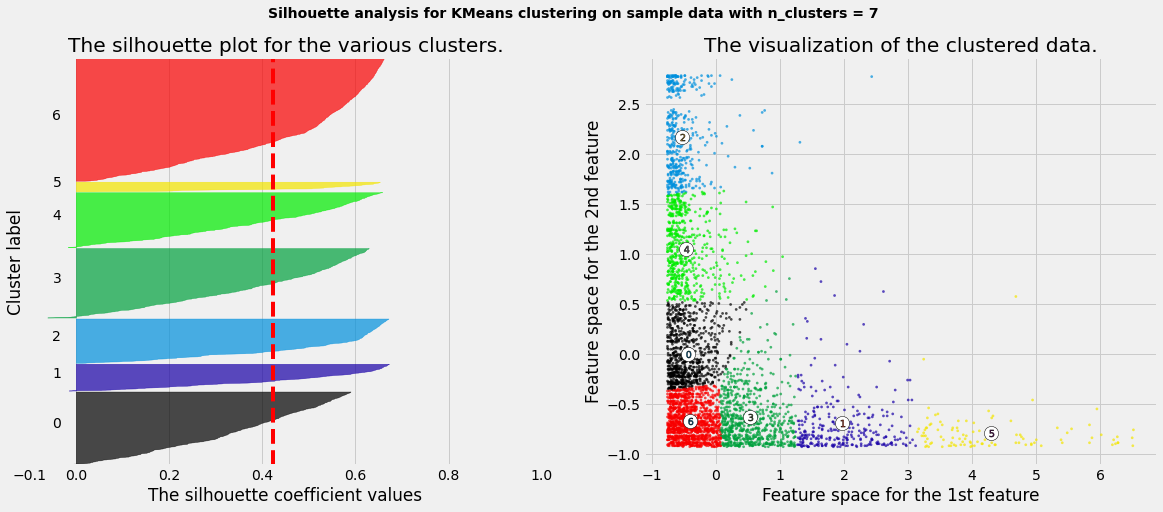

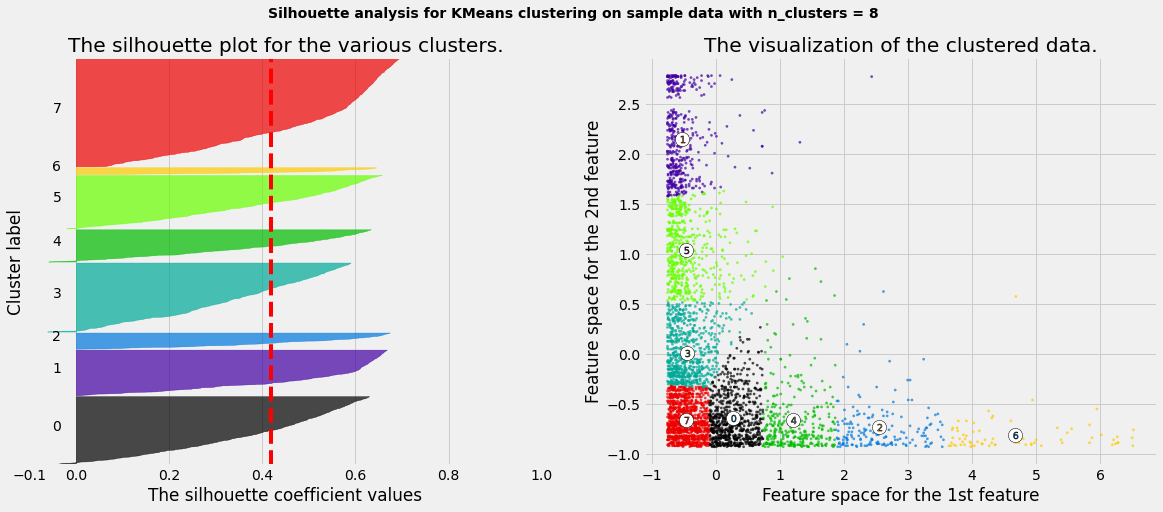

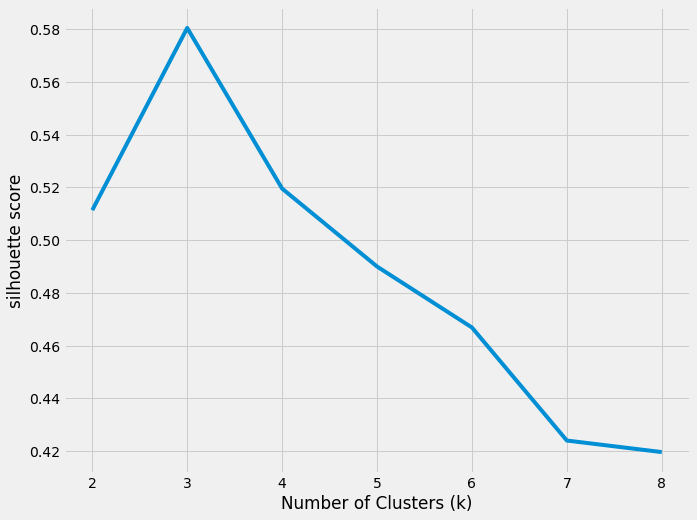

In [311]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.style as style
import scipy.cluster.hierarchy as sch
from collections import Counter

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
X=rfm_df_scaled[["Frequency", "Recency"]].to_numpy()
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle('Silhouette analysis for KMeans clustering on sample data '
                  'with n_clusters = %d' % n_clusters,
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

In [312]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

# Assign the labels to each data point, execute the following script.
kmeans.labels_
label_list=kmeans.labels_
sorted(Counter(label_list).items())

[(0, 2715), (1, 1047), (2, 497)]

In [313]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
1,12347,210263.69,186,2,2
2,12348,174939.60,28,75,0
3,12349,42183.30,72,18,0
4,12350,17937.80,16,310,1
5,12352,70157.81,82,36,0


Text(0, 0.5, 'Recency')

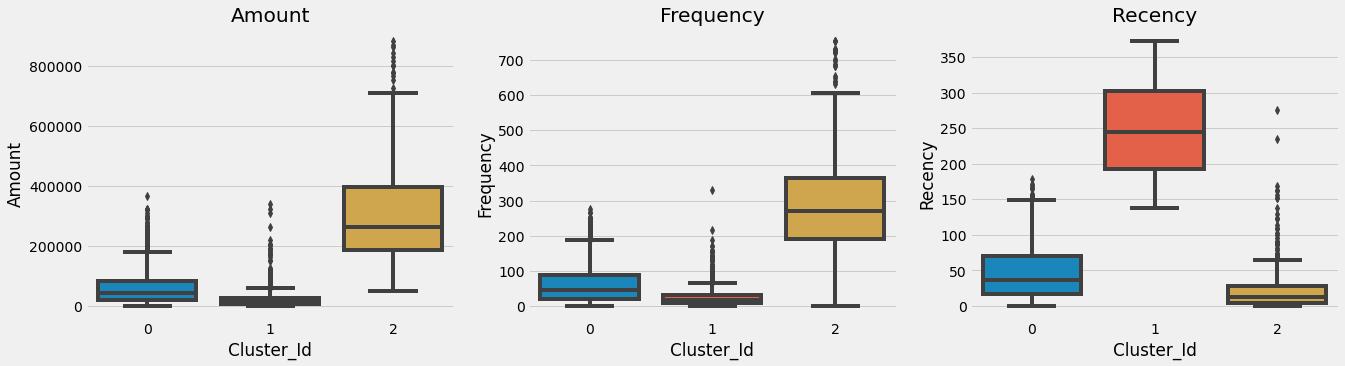

In [314]:
fig, ax = plt.subplots(figsize=(20,5), nrows= 1, ncols=3)

# Box plot to visualize Cluster Id vs Amount
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm, ax=ax[0])

# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm, ax=ax[1])

# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm, ax=ax[2])

ax[0].set_title("Amount")
ax[0].set_xlabel("Cluster_Id")
ax[0].set_ylabel("Amount")

ax[1].set_title("Frequency")
ax[1].set_xlabel("Cluster_Id")
ax[1].set_ylabel("Frequency")

ax[2].set_title("Recency")
ax[2].set_xlabel("Cluster_Id")
ax[2].set_ylabel("Recency")

